In [21]:
import pandas as pd
import re
import string

In [22]:
mapping_dict = {
        "thầy giáo": "giảng viên",
        "cô giáo": "giảng viên",
        "thầy": "giảng viên",
        "cô": "giảng viên",
        "giáo viên": "giảng viên",
        "vói": "với",
        "giời": "giờ",
        "nhiệt hình": "nhiệt tình",
        "side": "slide",
        "tân tình": "tận tình",
        "teacher": "giảng viên",
        "sadcolon": "colonsad",
        "vi dụ": "ví dụ",
        "easy": "dễ",
        "so vời": "so với",
        "tâp": "tập",
        "av": "tiếng anh",
        "nhannh": "nhanh",
        "h": "giờ",
        "đc": "được",
        "dc": "được",
        "smilesmile": "smile",
        "tron": "trong",
        "thướng": "hướng",
        "nghung": "nhưng",
        "chon": "chọn",
        "them": "thêm",
        "day": "dạy",
        "midterm": "giữa kỳ",
        "vi": "vì",
        "quýêt": "quyết",
        "teamwork": "làm việc nhóm",
        "over time": "quá giờ",
        "overtime": "quá giờ",
        "ot": "quá giờ",
        "outcome": "mục tiêu",
        "basic": "cơ bản",
        "check": "kiểm tra",
        "gmail": "email",
        "mail": "email",
        "teen": "trẻ",
        "style": "phong cách",
        "topic": "chủ đề",
        "slides": "slide",
        "slide": "slide",
        "giáo trình": "tài liệu",
        "slile": "slide",
        "silde": "slide",
        "web": "website",
        "online": "website",
        "nope": "không",
        "class": "lớp học",
        "fitted": "phù hợp",
        "chair": "ghế",
        "table": "bàn",
        "grammar": "ngữ pháp",
        "speaking": "kỹ năng nói",
        "listening": "kỹ năng nghe",
        "listenning": "kỹ năng nghe",
        "reading": "kỹ năng đọc",
        "writing": "kỹ năng viết",
        "good": "tốt",
        "english": "tiếng anh",
        "bad": "tệ",
        "feedback": "phản hồi",
        "elab": "lab",
        "group": "nhóm",
        "mic": "microphone",
        "micro": "microphone",
        "debate": "thảo luận",
        "test": "kiểm tra",
        "thưc": "thực",
        "courses": "khóa học",
        "course": "khóa học",
        "funny": "vui vẻ",
        "internet": "mạng",
        "perfect": "hoàn hảo",
        "quoa": "qua",
        "ok": "ổn",
        "sư phạm": "giảng dạy",
        "bigsmile": "smile",
        "smallsmile": "smile",
        "doublesurprise": "surprise",
        "show": "cho xem",
        "requirement": "yêu cầu",
        "assignments": "bài tập",
        "famous": "nổi tiếng",
        # 'store': 'cửa hàng',
        "presentation": "trình chiếu",
        "book": "sách",
        "ebook": "sách",
        "bạnem": "bạn",
        "not": "không",
        "cute": "dễ thương",
        "project": "đồ án",
        "dự án": "đồ án",
        "quỳên": "quyền",
        "colonsad": "sad",
        "miss": "thiếu",
        "hoat": "hoạt",
        "upload": "post",
        "design": "thiết kế",
        "home": "nhà",
        "give": "cho",
        "given": "cho",
        "sưc": "sức",
        "traning": "giảng dạy",
        "reply": "trả lời",
        "eemail": "email",
        "submit": "nộp",
        "hihi": "smile",
        "team": "nhóm",
        "very": "rất",
        "like": "thích",
        "chat": "trò chuyện",
        "lap": "laptop",
        "free": "miễn phí",
        "wed": "website",
        "update": "cập nhật",
        "pc": "máy tính",
        "ko": "không",
        "stepbystep": "từng bước",
        "again": "lần nữa",
        "outcomes": "mục tiêu",
        "outcomes": "mục tiêu",
        "lovelove": "love",
        "textbook": "tài liệu",
        "speak": "nói",
        "tasks": "bài tập",
        "sociable": "thân thiện",
        "shes": "giảng viên",
        "level": "cấp độ",
        'e-mail':'email',
        'step-by-step':'từng bước',
        'aproach': 'tiếp cận',
        't_t': 'sad',
        'trc': 'trước',
    }

In [23]:
stopwords = [
            "giảng viên",
            "fraction",
            "altera",
            "quad",
            "cnpm",
            "kaydotvn",
            "daadotuitdotedudotvn",
            "bohm",
            "dotnet",
            "visual studio code",
            "visual studio",
            "visual code",
            "visual",
            "mutton quad",
            "dreamweaver",
            "vertical fragmentation",
            "i-ta-li-a",
            "đbcl",
            "crt",
            "javabeans",
            "if",
            "for",
            "while",
            "struct",
            "pl",
            "windows phone",
            "pm",
            "assembly",
            "scrum_project",
            "scrum project",
            "css",
            "jquery",
            "vector",
            "gb",
            "ram",
            "ram",
            "...",
            "codefun",
            "egov",
            "java",
            "vmware",
            "placement",
            "fork",
            "round robin",
            "patin",
            "pattern",
            "serverside",
            "dotnet",
            "c++",
            "javascript",
            "ch",
            "uit khoa",
            "proteus",
            "console",
            "form",
            "vật lý học",
            "aep",
            "servlet",
            "skype",
            "doubledot",
            "poster",
            "everything",
            "amp",
            "app",
            "seo",
            "app",
            "progressive web",
            "xim",
            "win server",
            "đối với",
            "p",
            "s",
            "p s",
            "dropbox",
            "bạn",
            "cplusplus",
            "socket",
            "sub",
            "switch",
            
             "severside",
            "network programing with csharp",
            "dfd",
            "naives bayes",
            "naive",
            "bayes",
            "cs",
            "js",
            "max",
            "elg",
            "fix",
            "proxy",
            "hub",
            "bridge",
            "switch",
            "windows",
            "turnitindotcom",
            "extensive reading",
            "reading",
            "extensive",
            "search",
            "quick",
            "file header",
            "paper",
            "directx",
            "windows",
            "linux",
            "vote",
            "itdotf",
            "router",
            "silverlight",
            "đa luồng",
            "crack",
            "wrede",
            "dbpedia",
            "ontology",
            "tmf",
            "vhdl",
            "hdl",
            "jsp",
            "pđt",
            "lisp",
            "json",
            "cpp",
            "itp",
            "forum",
            "embeded",
            "system",
            "embeded system",
            "embedded",
            "titanium",
            "blackbery",
            "zun",
            "phonegap",
            "tizen",
            "je",
            "mediafire",
            "toeic",
            "ghz",
            "cpu",
            "module",
            "datapath",
            "papers",
            "daa",
            "dijktra",
            "oracal",
            "database",
            "access",
            "netbean",
            "facebook",
            "hackerrankdotcom",
            "sort",
            "multiagent",
            "th",
            "contemn",
            "dbms",
            "html",
            "php",
            "heapsort",
            "khmtdotuitdotedudotvn",
            "vdotv",
            "engine",
            "download",
            "input",
            "output",
            "wtf",
            "forum",
            "poison",
            "uit",
            "career",
            "như",
            "version",
            "outdoor",
            "coursedotuitdotedudotvn",
            "mini",
            "matlab",
            "standford",
            "name",
            "size",
            "framework",
            "ucla",
            "comment",
            "is",
            "we",
            "serverside",
            "cassette",
            "ios",
            "android",
            "scrum",
            "itdote",
            "xml",
            "photo",
            "down",
            "unikey",
            "3dsmax",
            "firmware",
            "km",
            "hackerrank",
            "projectbase",
            "er",
            "gay",
            "feed",
            
            "coursedotuitdotedudotvn",
            "nfc",
            "chip",
            "full",
            "oi",
            "ht",
            "ubuntu",
            "linux",
            "it",
            "wecode",
            "code",
            "oop",
            
            
            "macbook",
            "a_z",
            "moodle",
            "trang",
            "stack",
            "queue",
            
            "progressive",
            "at",
            "boss",
            "ic",
            "pdf",
            "driver",
            "room",
            "link",
            "thpt",
            "thcs",
            "murray",
            "store",
            "severside",
            "hes",
            "dsmax",
            "header",
            "prolog",
            "pro",
            "ida",
            "youtube",
            "hit",
            "google",
            "facebook",
            "twitter",
            "instagram",
            "linkedin",
            "pinterest",
            "tumblr",
            "reddit",
            "snapchat",
            "whatsapp",
            "viber",
            "line",
            "zalo",
            "wechat",
            "telegram",
            "skype",
            "vimeo",
            "flickr",
            "periscope",
            "twitch",
            "soundcloud",
            "spotify",
            "shazam",
            "apple",
            "samsung",
            "nokia",
            "sony",
            "lg",
            "htc",
            "huawei",
            "oppo",
            "vivo",
            "xiaomi",
            "meizu",
            "asus",
            "acer",
            "dell",
            "hp",
            "lenovo",
            "microsoft",
            "google",
            "amazon",
            "ebay",
            "alibaba",
            "paypal",
            "visa",
            "mastercard",
            "american express",
            "jcb",
            "smartphone",
            "word",
            "lap",
            "dev",
            "mfc",
            "protues",
            "unit",
            "srum",
            "dev",
            "are",
            "mfc",
            "protues",
            "ielts",
            "bit",
            "oracle",
            
            "user",
            "bus",
            "de",
            "...",
            "virus",
            "sql",
            "closeness",
            "topdown",
            "computer",
            "hhhhhhhhhhhhhhhhhhhhhhh",
            "betweenness", 'cc', 'tma',"và"
        ]

In [24]:
from underthesea import text_normalize, word_tokenize
def preprocess_text_vietnamese_to_tokens(text):
    text = text_normalize(text) 
    text = re.sub(r'[!"#$%&*+,\-./;<=>?@\[\\\]^`{|}~\t\n]', '', text)
    for original, replacement in mapping_dict.items():
        text = re.sub(r'\b' + re.escape(original) + r'\b', replacement, text)
        
    text = re.sub(r'\bcolon(\w+)\b', r'\1', text)
    text = re.sub(r'\bdoubledot(\w+)\b', r'\1', text)
    
    for prefix in ['wzjwz', 'wwzjwz', 'dot']:
        text = re.sub(r'\b' + re.escape(prefix) + r'\w*\b', '', text)

    
    text = re.sub(r'\d+', '', text)
    text = re.sub('\s+', ' ', text)
    stopwords_set = set(stopwords)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords_set and token.strip()]
    tokens = [mapping_dict.get(token, token) for token in tokens]
    
    return ' '.join(tokens)

In [25]:
train = pd.read_csv('UIT-VSFC_train.csv').dropna()
test = pd.read_csv('UIT-VSFC_test.csv').dropna()
dev = pd.read_csv('UIT-VSFC_dev.csv').dropna()

train.to_csv('UIT-VSFC_train.txt', sep='\t', index=False)
test.to_csv('UIT-VSFC_test.txt', sep='\t', index=False)
dev.to_csv('UIT-VSFC_dev.txt', sep='\t', index=False)

train = train.rename(columns={'sents': "text", 'sentiments': "label"})
test = test.rename(columns={'sents': "text", 'sentiments': "label"})
dev = dev.rename(columns={'sents': "text", 'sentiments': "label"})

In [26]:
train['text'] = train['text'].apply(lambda x: preprocess_text_vietnamese_to_tokens(x))
test['text'] = test['text'].apply(lambda x: preprocess_text_vietnamese_to_tokens(x))
dev['text'] = dev['text'].apply(lambda x: preprocess_text_vietnamese_to_tokens(x))

In [27]:
train.to_csv('processed_train.csv', index=False)
test.to_csv('processed_test.csv', index=False)
dev.to_csv('processed_dev.csv', index=False)

In [28]:
train.to_csv('processed_train.txt', sep='\t', index=False)
test.to_csv('processed_test.txt', sep='\t', index=False)
dev.to_csv('processed_dev.txt', sep='\t', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11426 entries, 0 to 11425
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    11423 non-null  object 
 1   label   11426 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.7+ KB
None
                                                text  label
0                              slide tài liệu đầy đủ    2.0
1         nhiệt tình giảng dạy gần gũi với sinh viên    2.0
2                 đi học đầy đủ full điểm chuyên cần    0.0
3  chưa áp dụng công nghệ thông tin các thiết bị ...    0.0
4  giảng bài hay có nhiều bài tập ví dụ ngay trên...    2.0


/tmp/ipykernel_7401/2597642214.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=["red", "gray", "green"])


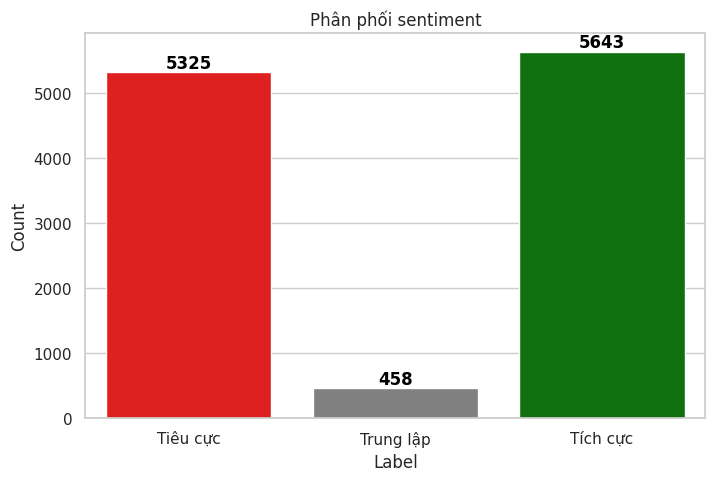

/tmp/ipykernel_7401/2597642214.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["label"], y=df["text_length"], palette=["red", "gray", "green"])


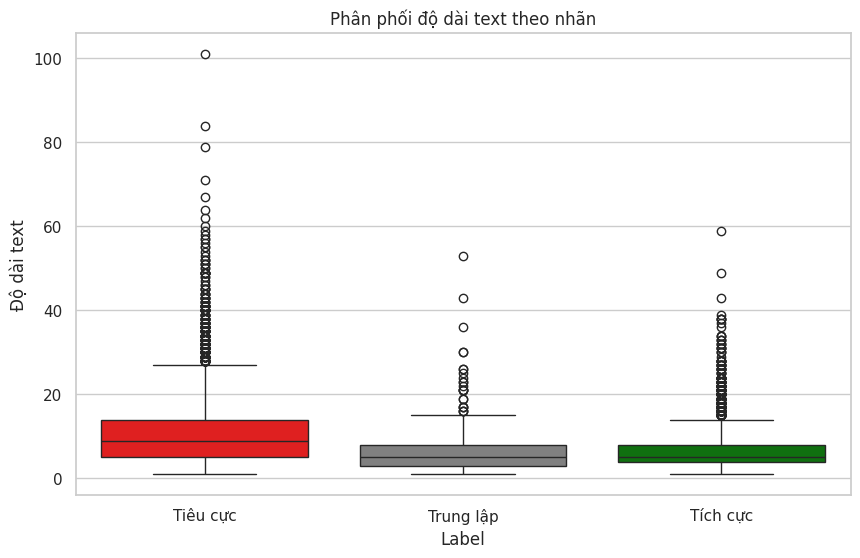

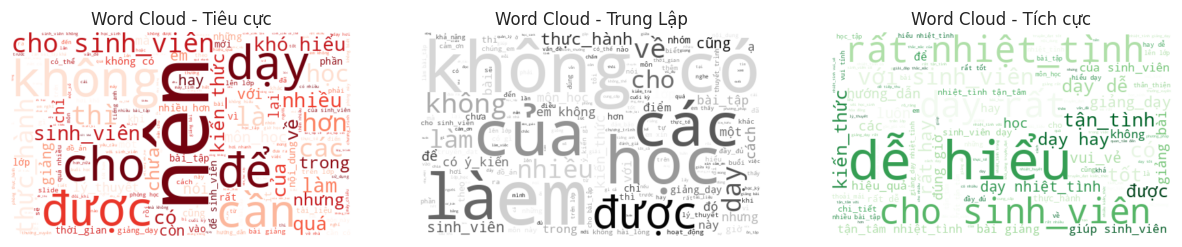

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Đọc dữ liệu từ file CSV
file_path = "processed_train.csv"  # Đổi đường dẫn nếu cần
df = pd.read_csv(file_path)

# Kiểm tra dữ liệu
print(df.info())
print(df.head())

# Đếm số lượng từng nhãn
label_counts = df["label"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=["red", "gray", "green"])
plt.xticks(ticks=[0, 1, 2], labels=["Tiêu cực", "Trung lập", "Tích cực"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Phân phối sentiment")

# Thêm số trên mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

# Tính độ dài văn bản
# Tokenize văn bản trước khi tính độ dài
df["tokenized_text"] = df["text"].astype(str).apply(lambda x: word_tokenize(x, format="text"))

# Tính độ dài văn bản (theo số từ)
df["text_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

# Vẽ biểu đồ hộp độ dài văn bản theo nhãn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["label"], y=df["text_length"], palette=["red", "gray", "green"])
plt.xticks(ticks=[0, 1, 2], labels=["Tiêu cực", "Trung lập", "Tích cực"])
plt.xlabel("Label")
plt.ylabel("Độ dài text")
plt.title("Phân phối độ dài text theo nhãn")
plt.show()

# Vẽ Word Cloud cho từng nhãn
colors = {0: "Reds", 1: "gray", 2: "Greens"}

plt.figure(figsize=(15, 5))
for i, label in enumerate([0, 1, 2]):
    text_data = " ".join(df[df["label"] == label]["tokenized_text"])
    wordcloud = WordCloud(width=500, height=300, background_color="white", colormap=colors[label]).generate(text_data)
    if i == 0:
        temp = "Tiêu cực"
    elif i == 1:
        temp = "Trung Lập"
    elif i == 2:
        temp = "Tích cực"
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {temp}")

plt.show()
